In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
file_path = 'sales(in).csv'
data = pd.read_csv(file_path)
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [11]:
weekly_sales_columns = [col for col in data.columns if col.startswith('W')]
weekly_sales_data = data[weekly_sales_columns]

In [13]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(weekly_sales_data)

In [17]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_data)

In [19]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=weekly_sales_columns)

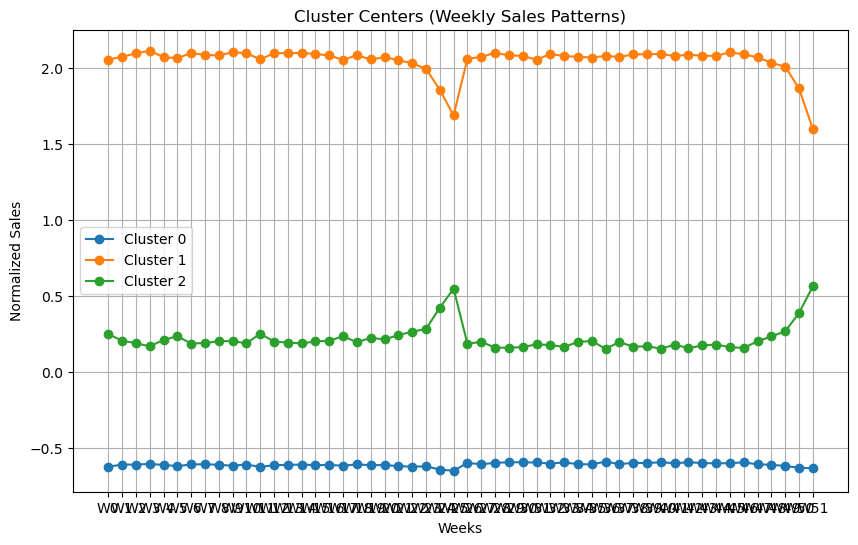

In [21]:
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.plot(weekly_sales_columns, cluster_centers.iloc[i], marker='o', label=f'Cluster {i}')
plt.title('Cluster Centers (Weekly Sales Patterns)')
plt.xlabel('Weeks')
plt.ylabel('Normalized Sales')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
cluster_counts = data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
0    490
2    197
1    124
Name: count, dtype: int64


In [25]:
data.to_csv('sales(in).csv', index=False)
print("Clustered data saved to 'sales_clusters.csv'")

Clustered data saved to 'sales_clusters.csv'
